<a href="https://colab.research.google.com/github/mertylcndg/Introduction_to_Machine_Learning/blob/main/Digit_Dataset_Examination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline


# The Digit Dataset

This dataset is made up of 1797 8x8 images. Each image,
like the one shown below, is of a hand-written digit.
In order to utilize an 8x8 figure like this, we'd have to
first transform it into a feature vector with length 64.

See `here
<https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits>`_
for more information about this dataset.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# Loading Data

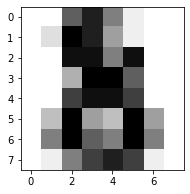

In [3]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from sklearn import datasets

import matplotlib.pyplot as plt

# Load the digits dataset
digits = datasets.load_digits()

# Display the last digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

# Examination

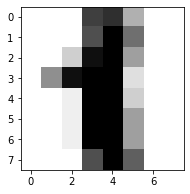

In [4]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [5]:
type(digits)

sklearn.utils.Bunch

In [6]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
digits.images[-1]

array([[ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  2., 16., 14.,  6.,  1.,  0.,  0.],
       [ 0.,  0., 15., 15.,  8., 15.,  0.,  0.],
       [ 0.,  0.,  5., 16., 16., 10.,  0.,  0.],
       [ 0.,  0., 12., 15., 15., 12.,  0.,  0.],
       [ 0.,  4., 16.,  6.,  4., 16.,  6.,  0.],
       [ 0.,  8., 16., 10.,  8., 16.,  8.,  0.],
       [ 0.,  1.,  8., 12., 14., 12.,  1.,  0.]])

In [9]:
y_train = pd.DataFrame(digits.target)

In [10]:
y_train.head()

,0
0,0
1,1
2,2
3,3
4,4


In [11]:
type(y_train)

pandas.core.frame.DataFrame

In [12]:
y_train.value_counts().sort_index()

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
dtype: int64

Text(0.5, 1.0, 'number of digit classes')

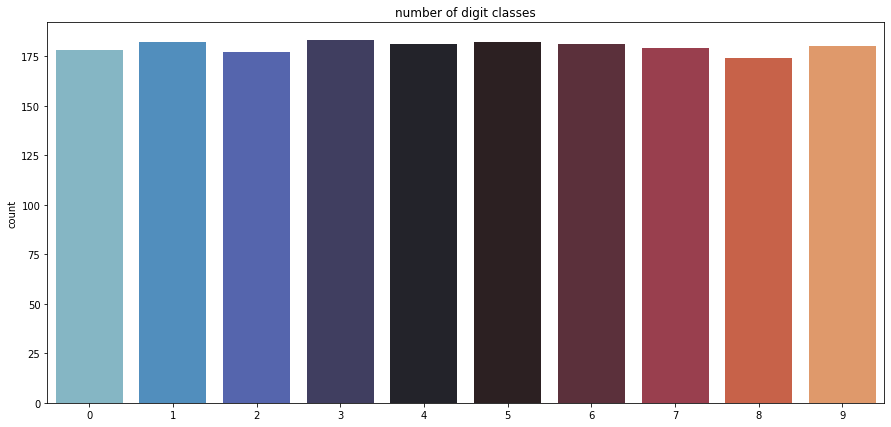

In [13]:
#visualization
plt.figure(figsize=(15,7))
g=sns.countplot(digits.target ,palette='icefire')
plt.title('number of digit classes')

# Convert ndarray to pandas DataFrame



In [14]:
type(digits.images)

numpy.ndarray

In [15]:
digits.images.shape

(1797, 8, 8)

In [16]:
# img=digits.images
# img_reshape = img.reshape(1797,64)
# df = pd.DataFrame(img_reshape,columns=digits.feature_names)

In [17]:
type(digits.data)

numpy.ndarray

In [18]:
digits.data.shape

(1797, 64)

In [19]:
x_train = pd.DataFrame(digits.data,columns=digits.feature_names)

In [20]:
x_train.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


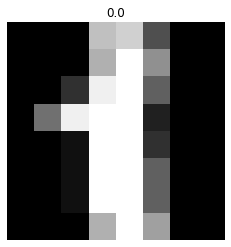

In [21]:
#visualization of a random sample(3rd index)
img=x_train.iloc[1].to_numpy()
img=img.reshape((8,8))
plt.imshow(img,cmap='gray')
plt.title(x_train.iloc[0,0])
plt.axis("off")
plt.show()

## Reshape
* Train and test images (28x28)
* Reshape all data to 28x28x1 3D matrices (1 is for grayscaled)

In [22]:
x_train=x_train.values.reshape(-1,8,8,1)
print("x_train shape: ",x_train.shape)

x_train shape:  (1797, 8, 8, 1)
